## Problem Statement

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and we have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables

tweet_id airline_sentiment airline_sentiment_confidence negativereason negativereason_confidence airline airline_sentiment_gold name negativereason_gold retweet_count text tweet_coord tweet_created tweet_location user_timezone

### Load the csv file

## 1: Importing the Liberaries

In [1]:
import pandas as pd ### pandas is used for data manipulation
import numpy as np ### np is used for numerical operations
import matplotlib.pyplot as plt ### matplotlib.pyplot is used for data Visualization
import seaborn as sns

## 2: Reading the Data set .(see which format the dataset is like .csv, or. xlsx)

In [2]:
df = pd.read_csv('twitter-airline-sentiment.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


### info

## 3: Exploratory Data Analysis

In [3]:
df.head()  ### head is used to get first five rows of the dataset.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Which coloumns are catagorical and numerical :
#### catagorical columns are : airline sentiment, negative reason, airline, airline_sentiment_gold, name, negative_reason_gold, text, tweet_location, user_timezone are categorical columns. --9
#### Numerical columns are : tweet_id,airline_sentiment_confidence, negative_reason_confidence, retweet_count, tweet_cord, tweet_created --6

In [4]:
df.columns  #Columns/features in data

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

#### 3.1.Length of the dataset

In [5]:
print('length of data is', len(df)) #Length of the dataset

length of data is 14640


In [6]:
df. shape #Shape of data

(14640, 15)

#### 3.2. Data information

In [7]:
### Checking the info about the dataset.
#### gives information on the dataset 
  #### 1. how many coloumns are present.       ------- 15
  #### 2. what are the diffrent datatypes that are present in different columns --- integer, string, float
  #### 3. Check the number of entries present (this many rows are present in the dataset).  --- 14640
  #### 4. If there are any null values present in the data set. --- yes, negativereason, negativereason_confidence, 
#####airline_sentiment_gold,negativereasson_gold, tweet_coord , tweet_coord , user_timezone  ---- 7 null columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

##### Table - 1-3 Data Information

In [9]:
df.dtypes #Datatypes of all columns

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
## Let's get the count of Airline
print(df['airline'].nunique())
print(df['airline'].value_counts().sort_values(ascending=False))

6
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


### Check for null values

In [11]:
np.sum(df.isnull().any(axis=1))

14638

In [12]:
df.columns[df.isnull().sum()>0]

Index(['negativereason', 'negativereason_confidence', 'airline_sentiment_gold',
       'negativereason_gold', 'tweet_coord', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [13]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [15]:
for i in df.columns:
    print('Percentage of missing values is {} % in {}'.format(round(
        (df[i].isnull().sum()/df.shape[0])*100,2),i))
    ### round function is used to get  2 values after decimal place

Percentage of missing values is 0.0 % in tweet_id
Percentage of missing values is 0.0 % in airline_sentiment
Percentage of missing values is 0.0 % in airline_sentiment_confidence
Percentage of missing values is 37.31 % in negativereason
Percentage of missing values is 28.13 % in negativereason_confidence
Percentage of missing values is 0.0 % in airline
Percentage of missing values is 99.73 % in airline_sentiment_gold
Percentage of missing values is 0.0 % in name
Percentage of missing values is 99.78 % in negativereason_gold
Percentage of missing values is 0.0 % in retweet_count
Percentage of missing values is 0.0 % in text
Percentage of missing values is 93.04 % in tweet_coord
Percentage of missing values is 0.0 % in tweet_created
Percentage of missing values is 32.33 % in tweet_location
Percentage of missing values is 32.92 % in user_timezone


#### tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.
#### **Columns with more than 90% missing values will be deleted**

In [16]:
df.drop(['tweet_coord'], axis = 1,inplace=True)
df.drop(['airline_sentiment_gold'], axis = 1,inplace=True)
df.drop(['negativereason_gold'], axis = 1,inplace=True)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 3.4. Descriptive Analytics

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,NaN,NaN,NaN,569218351767382528.0,779111158481836.75,567588278875213824.0,568559178101439488.0,569477857923110912.0,569890473289000960.0,570310600460525568.0
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640.0,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1.0,1.0,1.0
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522.0,NaN,NaN,NaN,0.638298,0.33044,0.0,0.3606,0.6706,1.0,1.0
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640.0,NaN,NaN,NaN,0.08265,0.745778,0.0,0.0,0.0,0.0,44.0
text,14640,14427,@united thanks,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### value counts of airlines for positive, negative, neutral

#### **As the data set has data for 6 airlines, let's get a count of positive, negative and neutral for each airline**

In [18]:
list(df['airline'].value_counts().index)

['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']

In [19]:
df['airline_sentiment'].unique()  ### Check unique airline_sentiment values

array(['neutral', 'positive', 'negative'], dtype=object)

In [20]:
df['airline_sentiment'].nunique() ## Check the number airline_sentiment of  values

3

In [21]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [22]:
for col in df.select_dtypes(include='object').columns:
    print('count_values of {}\n {} '.format(col,df[col].value_counts()))

count_values of airline_sentiment
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64 
count_values of negativereason
 Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64 
count_values of airline
 United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64 
count_values of name
 JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Na

#### So we have data set of 6 airlines

In [23]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


### Univariate Plots

### Cloudcount Plot used for To get the categorical values.
#### It tells what is the frequency, for the count 

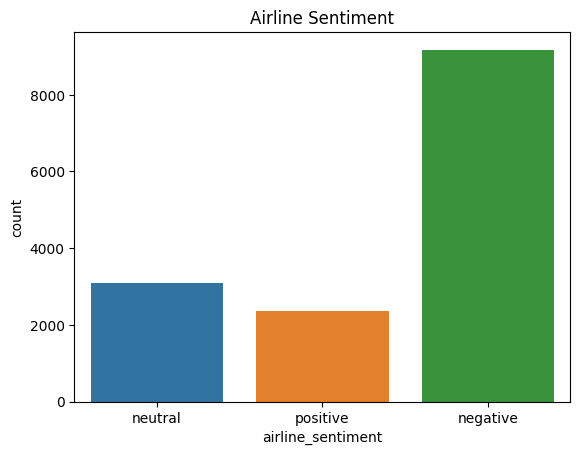

In [24]:
sns.countplot(data=df,x='airline_sentiment');
plt.title('Airline Sentiment');
plt.show();

In [25]:
#### Airline Sentiment for different airlines

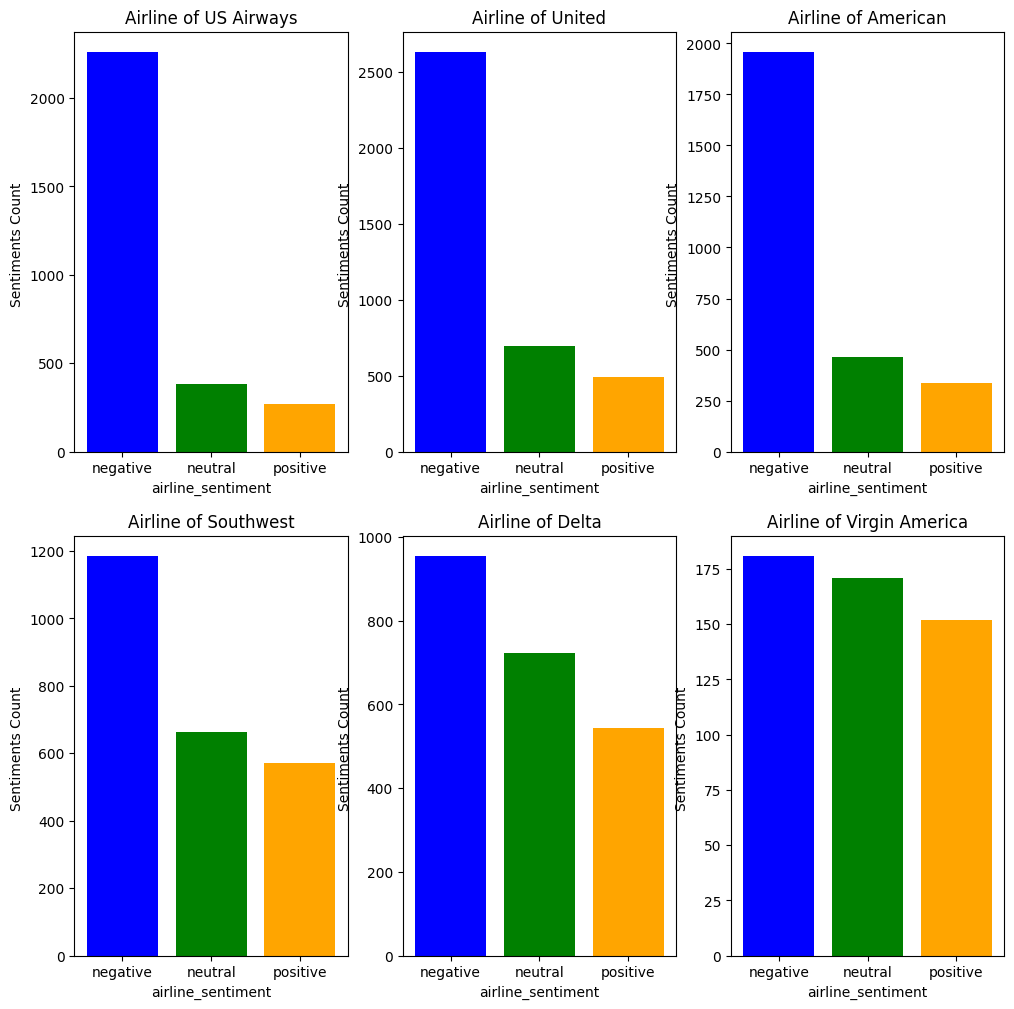

In [26]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['blue', 'green', 'orange'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiments Count ')
    plt.xlabel('airline_sentiment')
    plt.title('Airline of '+i)

#### Mostly negative reactions are for United, US Airways, American airline.
#### Tweets for Virgin America are the most balanced.

1. **US Airways have a least positive sentiment followed by American and United.**
2. **Virgin America has most balanced sentiments**

### Bivariate Plots

In [27]:
#### we have to exclude the object because these plots are used for only numerical columns

In [28]:
def uni_plot(columns):
    plt.Figure(figsize= (15,10))
    plt.subplot(2,2,1)
    sns.histplot(data= df, x= columns,bins=0,kde=True,legend = True)
    plt.axvline(x = df[columns].median(),ymin=0,ymax=1,color = 'r')## Range is always from 0 to 1, but we can change
    plt.axvline(x = df[columns].mean(),ymin=0,ymax=1,color = 'b')# right skewed mean is > than the median, beca mean is affected by extreme values
    ##plt.xticks(np.arange(0,5,0.2, rotation = 45),)  # for changing the axis scale, for normal distribution mean and median value is somewhat similar
    plt.title('Histogram of i {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data = df,x= columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()
    

### Multiverial plots
#### corelation

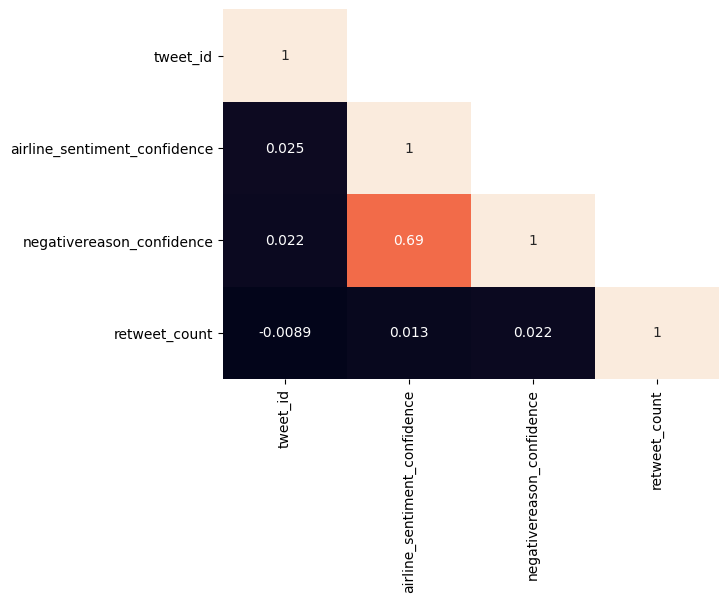

In [29]:
sns.heatmap(df.corr(),annot = True,cbar =False, mask = np.triu(df.corr(),+1))
plt.show()

### Basic Exploration in Text Mining Number of words

### word count in each document
**Number of words**
##### To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is
1. **same as defining a permanent function**
2. **As these function are temporary, memory consumption is less in comparison to permanent function, Also there are multiple ways to get a similar output**

**Let's get a word count without writing a lambda function**

In [30]:
df['totalwords'] = [len(x.split()) for x in df['text'].tolist()]
df[['text','totalwords']].head()

,text,totalwords
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [31]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


### Number of Characters- including spaces

In [32]:
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

,text,char_count
0,@VirginAmerica What @dhepburn said.,35
1,@VirginAmerica plus you've added commercials t...,72
2,@VirginAmerica I didn't today... Must mean I n...,71
3,@VirginAmerica it's really aggressive to blast...,126
4,@VirginAmerica and it's a really big bad thing...,55


### Average Word Length

In [33]:
def avg_word(sentence):
    words = sentence.split() ### spliting whereever we find white space
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
0,@VirginAmerica What @dhepburn said.,8.000000
1,@VirginAmerica plus you've added commercials t...,7.111111
2,@VirginAmerica I didn't today... Must mean I n...,5.000000
3,@VirginAmerica it's really aggressive to blast...,6.470588
4,@VirginAmerica and it's a really big bad thing...,4.600000


In [34]:
###!pip install nltk

In [35]:
import nltk
###nltk.download('stopwords')

### Number of stop Words:

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Number of special character:

In [37]:
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['text','hastags']].head()

,text,hastags
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1


### Number of numerics:

In [38]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


### Number of Uppercase Words:

In [39]:
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


### Let's get an idea of most frequently used words in negative tweets:


hint use,  from wordcloud import WordCloud,STOPWORDS

In [30]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.3/153.3 kB 277.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


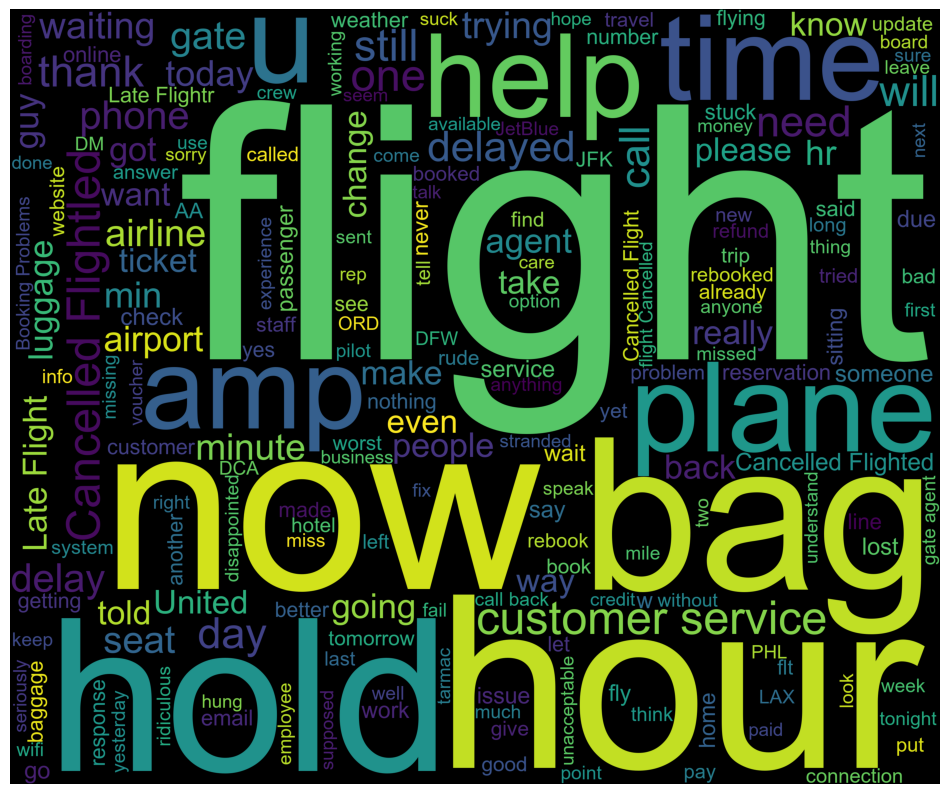

In [40]:
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(font_path='./arial.ttf',stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500,
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### understand the reason for negativity for each airline:

1. **In the above word cloud there are certain words probably will not make too much sense to study the reason for negative sentiment and subsequently based on the frequency of these words we will decide if the same needs to be deleted**
2. **Lets understand the reason for negativity for each airline:**

In [42]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

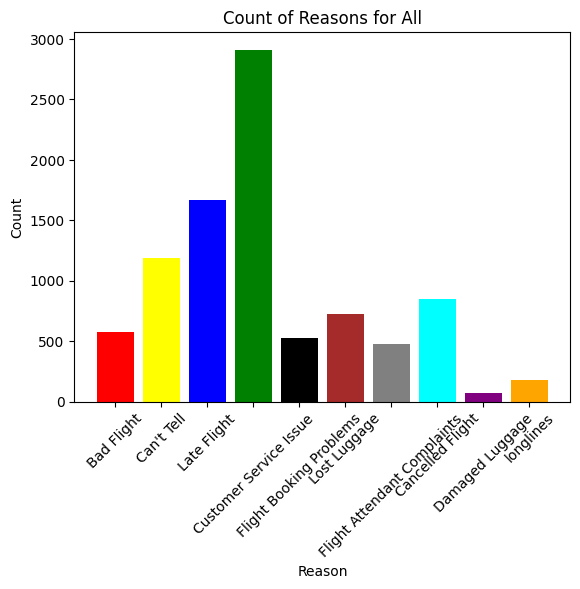

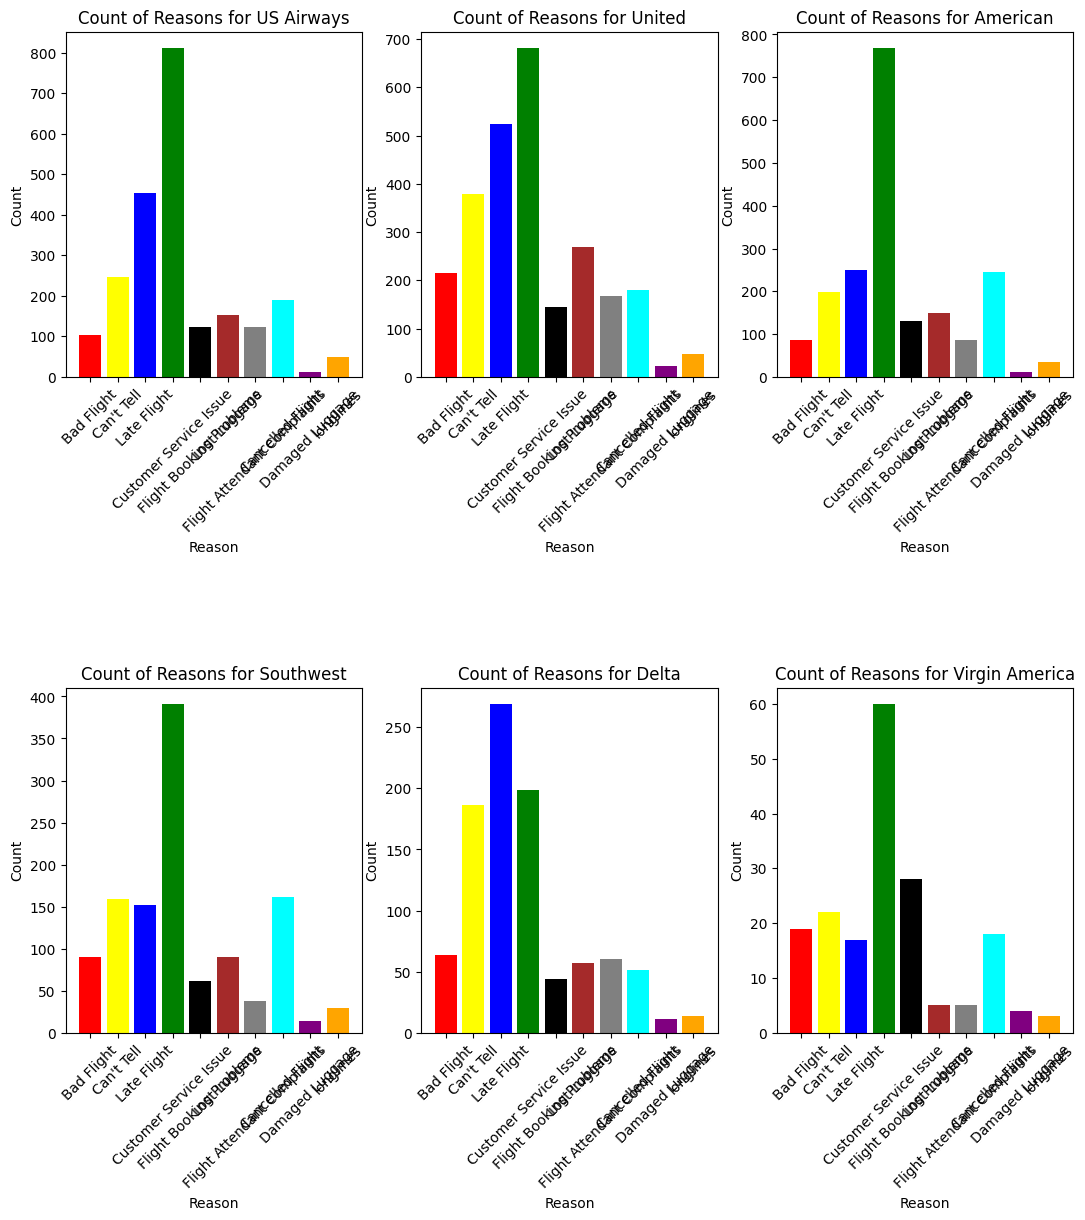

In [43]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=45)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

1. **Customer Service Issue is the main negative reason for US Airways,United,American,Southwest,Virgin America**
2. **Late Flight is the main negative reason for Delta.**
3. **Interestingly, Virgin America has the least count of negative reasons (all less than 60)**
4. **Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)**

Readers are advised to perform the similar analysis for Positive and Neutral tweets as well.

### Basic Pre-Processing  
Removal of StopWords, Removal of Punctuation:, Lower Case conversion:,  Common Words Removal



**Lower Case conversion:**

In [44]:
df['Tweet'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Tweet'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: Tweet, dtype: object

**Removal of Punctuation:**

In [45]:
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
df['Tweet'].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6952\424795428.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')


0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: Tweet, dtype: object

**Removal of StopWords**

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tweet'].head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


**Common Words Removal**
1. **We will create a list of 10 frequently occurring words and then decide if we need to remove it or retain it**
2. **Reason is that this file has tweets related to flights.. So no point in keeping the words like name, unless we have tweets related to different category**
3. **Name of the specific airline is not removed as we would require the name of the airline for bigram analysis**

In [48]:
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[-50:]
freq

companions                1
aim                       1
pleasehow                 1
functionally              1
gimme                     1
combat                    1
2212015                   1
infinity                  1
dani                      1
letitgo                   1
deed                      1
httptco0pdntgbxc6         1
essentials                1
hotlanta                  1
httptcox5zqssjtrb         1
galaxy                    1
s4                        1
scroll                    1
httptcoqxteqzm3yz         1
get2                      1
rumor                     1
898                       1
peanutsonaplatter         1
380                       1
planefirstclass           1
1708                      1
phxgtdal                  1
danihampton               1
curse                     1
notmadeofmoney            1
209                       1
airfares                  1
angering                  1
slowness                  1
ack                       1
httptcoqrxvzfrd1z   

**Please note that we are removing the digit 2 here. This 2 might mean "to" in English. However as advanced library package of NLP are not used, this would get treated as a digit and hence we are removing the same:**

In [49]:
freq =['flight','2']

In [50]:

df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Rare Words Removal**
**>This is done as association of these less occurring words with the existing words could be a noise**
> **As it is difficult to make out if these words will have association in text analytics or not, hence to start with these words are kept in the dataset**

In [51]:
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[-10:]
freq

6yearold             1
portrayed            1
integrating          1
clowns               1
433                  1
milwaukee            1
httptco07xhcacjax    1
supporter            1
jesus                1
blackberry10         1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [52]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet, dtype: object

### look at the overall distribution of positive, negative and neutral sentiments

<Axes: ylabel='airline_sentiment'>

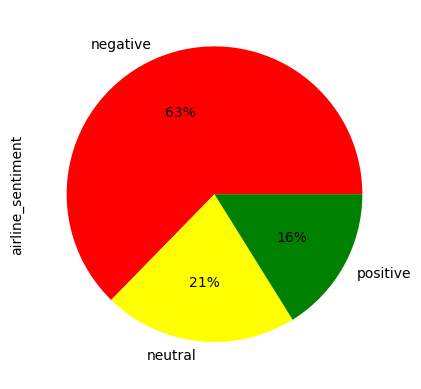

In [53]:
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  w

In [55]:
processed_features = df.iloc[:, 20].values
labels = df.iloc[:, 1].values

In [56]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair 8 ppl need know many seats next plz put us standby 4 people next'],
      dtype=object)

In [57]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [59]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [61]:
y_train

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

## Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [63]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9925717213114754
[[7279   27    2]
 [   4 2451   30]
 [   5   19 1895]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7308
     neutral       0.98      0.99      0.98      2485
    positive       0.98      0.99      0.99      1919

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712



In [64]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.757172131147541
[[1722  108   40]
 [ 318  251   45]
 [ 131   69  244]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.59      0.41      0.48       614
    positive       0.74      0.55      0.63       444

    accuracy                           0.76      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928



#### Since the Sentiment is imbalanced, and finding actual sentiment of the passennger is important,the metric to watch out for in this case can be F1 score which is nothing but the harmonic mean between precision and recall.
#### Precision and Recall are complementary metrics that have an inverse relationship. If both are of interest to us then we use the F1 score to combine precision and recall into a single metric.

## Decision Tree Model

In [65]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9925717213114754
[[7282   26    0]
 [   6 2452   27]
 [   7   21 1891]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7308
     neutral       0.98      0.99      0.98      2485
    positive       0.99      0.99      0.99      1919

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712



In [67]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6673497267759563
[[1445  300  125]
 [ 277  272   65]
 [ 117   90  237]]
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78      1870
     neutral       0.41      0.44      0.43       614
    positive       0.56      0.53      0.54       444

    accuracy                           0.67      2928
   macro avg       0.58      0.58      0.58      2928
weighted avg       0.67      0.67      0.67      2928



## Discriminant Analysis

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8734631147540983
[[6846  360  102]
 [ 490 1860  135]
 [ 216  179 1524]]
              precision    recall  f1-score   support

    negative       0.91      0.94      0.92      7308
     neutral       0.78      0.75      0.76      2485
    positive       0.87      0.79      0.83      1919

    accuracy                           0.87     11712
   macro avg       0.85      0.83      0.84     11712
weighted avg       0.87      0.87      0.87     11712



In [70]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7581967213114754
[[1604  209   57]
 [ 215  342   57]
 [ 100   70  274]]
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1870
     neutral       0.55      0.56      0.55       614
    positive       0.71      0.62      0.66       444

    accuracy                           0.76      2928
   macro avg       0.70      0.68      0.69      2928
weighted avg       0.76      0.76      0.76      2928



**Out of the 3 models given above, considering the different between train and test dataset performance parameters, LDA has performed the best.**

## Let's Recreate model with only 2 classes where positive and neutral tweets are merged and treated as non-negative

In [71]:
def Tweet(x):
    if x == "positive":
        return "Non-Negative"
    elif x == 'neutral':
        return "Non-Negative"
    else: return "Negative"

In [72]:
df["M-Sentiment"] = df["airline_sentiment"].apply(Tweet)

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,...,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet,M-Sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,...,4,4,35,8.000000,0,2,0,0,virginamerica dhepburn said,Non-Negative
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,...,9,9,72,7.111111,3,1,0,0,virginamerica plus youve added commercials exp...,Non-Negative
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,...,12,12,71,5.000000,2,1,0,2,virginamerica didnt today must mean need take ...,Non-Negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,...,17,17,126,6.470588,6,1,0,0,virginamerica really aggressive blast obnoxiou...,Negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,...,10,10,55,4.600000,5,1,0,0,virginamerica really big bad thing,Negative


**Recheck the levels of the newly created field**

In [73]:
df["M-Sentiment"].value_counts(normalize=True)

Negative        0.626913
Non-Negative    0.373087
Name: M-Sentiment, dtype: float64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  w

In [76]:
processed_features = df.iloc[:, 20].values
labels = df.iloc[:, 21].values

In [77]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair 8 ppl need know many seats next plz put us standby 4 people next'],
      dtype=object)

In [78]:
labels

array(['Non-Negative', 'Non-Negative', 'Non-Negative', ...,
       'Non-Negative', 'Negative', 'Non-Negative'], dtype=object)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [80]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [82]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
y_train

array(['Non-Negative', 'Negative', 'Negative', ..., 'Negative',
       'Negative', 'Negative'], dtype=object)

## Random Forest Model as Binary Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [85]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7279   29]
 [   9 4395]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [86]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7995218579234973
[[1643  227]
 [ 360  698]]
              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85      1870
Non-Negative       0.75      0.66      0.70      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.77      0.78      2928
weighted avg       0.80      0.80      0.80      2928



**We will consider Recall as model evaluation metric to measure the performance of the model. As it can help the airline to target customers who have a negative opinion on the airlines to convert them into non negative. As the main goal here will be to reduce the type-2 error in our model.
for e.g. Consider a passenger who has given a negative feedback but out model predicted non-negative, This can be unacceptable.
Results are better than 3 levels random forest classification, however difference between train and test score is still large. Let's see if hyperparamter tuning can improve the result**

**Grid Search for finding the optimal number of parameters:**

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [88]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100]})

In [89]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [90]:
best_grid = grid_search.best_estimator_

In [91]:
best_grid

RandomForestClassifier(max_depth=7, max_features=8, min_samples_leaf=5,
                       min_samples_split=50)

In [92]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7279   29]
 [   9 4395]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [93]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7995218579234973
[[1643  227]
 [ 360  698]]
              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85      1870
Non-Negative       0.75      0.66      0.70      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.77      0.78      2928
weighted avg       0.80      0.80      0.80      2928



##### No improvement in the result

## Decision Tree with Binary classification

In [94]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier( random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [95]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967554644808743
[[7281   27]
 [  11 4393]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      7308
Non-Negative       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [96]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7137978142076503
[[1387  483]
 [ 355  703]]
              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77      1870
Non-Negative       0.59      0.66      0.63      1058

    accuracy                           0.71      2928
   macro avg       0.69      0.70      0.70      2928
weighted avg       0.72      0.71      0.72      2928



##### Random Forest results were better than the output from decision tree on the test data set

##### Let's regularize the tree to find out if this will perform better:

In [97]:
reg_DT_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=10,min_samples_split=30)
reg_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [98]:
## Performance Matrix on train data set
y_train_predict = reg_DT_model.predict(X_train)
model_score = reg_DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7482069672131147
[[6603  705]
 [2244 2160]]
              precision    recall  f1-score   support

    Negative       0.75      0.90      0.82      7308
Non-Negative       0.75      0.49      0.59      4404

    accuracy                           0.75     11712
   macro avg       0.75      0.70      0.71     11712
weighted avg       0.75      0.75      0.73     11712



In [99]:
## Performance Matrix on test data set
y_test_predict = reg_DT_model.predict(X_test)
model_score = reg_DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7288251366120219
[[1648  222]
 [ 572  486]]
              precision    recall  f1-score   support

    Negative       0.74      0.88      0.81      1870
Non-Negative       0.69      0.46      0.55      1058

    accuracy                           0.73      2928
   macro avg       0.71      0.67      0.68      2928
weighted avg       0.72      0.73      0.71      2928



##### On a Regularized Tree, Non-Negative recall is not good, hence for comparison we will consider the model which was built without regularization

## Discriminant Analysis with Binary Classifier

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [101]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8981386612021858
[[6797  511]
 [ 682 3722]]
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      7308
Non-Negative       0.88      0.85      0.86      4404

    accuracy                           0.90     11712
   macro avg       0.89      0.89      0.89     11712
weighted avg       0.90      0.90      0.90     11712



In [102]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8032786885245902
[[1590  280]
 [ 296  762]]
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      1870
Non-Negative       0.73      0.72      0.73      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.79      0.79      2928
weighted avg       0.80      0.80      0.80      2928



1. **Linear Discriminant model has performed the best even without any hyperparameter tuning for both the classes**
2. **Test and Train performance is within the accepted limited of +/- 10%**

## Conclusion

Out of the 3 models given above, considering the difference between train and test dataset performance parameters, LDA has performed the best.(for both 3 classes and binary classification)

In terms of sentiments, based on the organisation objective, either positive, negative or neutral metrics could be analysed to define the marketing strategy e.g. based on negative sentiments key words organisation can decide on what they should concertrate for improvement.


**One important observation**

> **Its not necessary that parameter tuning will always result in a better model. As we have observed in Random Forest when Grid Search was used there was no improvement in the recall value of both the classes.and in case of Decision Tree, recall for non-negative has gone down , post regularization. Sometimes, hyper parameter tuning might result in overfitting of models also.**